# Diabetes Progression Prediction using ANN

Using sklearn Diabetes dataset.


## 1. Loading and Preprocessing

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import load_diabetes
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, r2_score
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

In [6]:
data = load_diabetes()
X = data.data
y = data.target
df = pd.DataFrame(X, columns=data.feature_names)
df['target'] = y
df.head()

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6,target
0,0.038076,0.050680,0.061696,0.021872,-0.044223,-0.034821,-0.043401,-0.002592,0.019907,-0.017646,151.0
1,-0.001882,-0.044642,-0.051474,-0.026328,-0.008449,-0.019163,0.074412,-0.039493,-0.068332,-0.092204,75.0
2,0.085299,0.050680,0.044451,-0.005670,-0.045599,-0.034194,-0.032356,-0.002592,0.002861,-0.025930,141.0
3,-0.089063,-0.044642,-0.011595,-0.036656,0.012191,0.024991,-0.036038,0.034309,0.022688,-0.009362,206.0
4,0.005383,-0.044642,-0.036385,0.021872,0.003935,0.015596,0.008142,-0.002592,-0.031988,-0.046641,135.0


In [7]:
df.isnull().sum()

age       0
sex       0
bmi       0
bp        0
s1        0
s2        0
s3        0
s4        0
s5        0
s6        0
target    0
dtype: int64



- ### Steps Performed

    The diabetes dataset is loaded from sklearn.datasets.

    Features (X) and target (y) are separated.

    A DataFrame is created for easier analysis.

    Missing values are checked.

    Features are normalized using StandardScaler.

- ### Why Preprocessing is Important

    Neural networks perform better when features are on the same scale.

    Normalization improves training speed and model stability.

- ### Tools Used

    ``load_diabetes()``

    ``StandardScaler``

## 2. Exploratory Data Analysis (EDA)

In [8]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

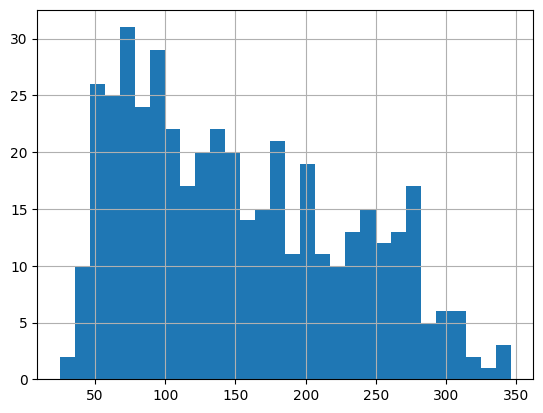

In [9]:
df['target'].hist(bins=30)
plt.show()

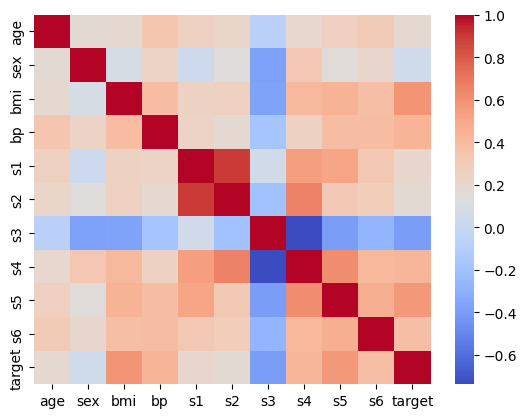

In [10]:
sns.heatmap(df.corr(), cmap='coolwarm')
plt.show()



### - Steps Performed

A histogram is plotted to understand the distribution of the target variable.

A correlation heatmap is created to observe relationships between features and target.

### - Insights from EDA

Some features show stronger correlation with diabetes progression.

The target variable follows a continuous distribution, suitable for regression.

### - Why EDA is Important

Helps in understanding data behavior.

Assists in choosing the correct model type (regression).

## 3.Building the ANN Model

### - Architecture Used

  1. Input Layer: Number of neurons equals number of features.

  - Hidden Layers:

      First hidden layer with 64 neurons (ReLU activation)

      Second hidden layer with 32 neurons (ReLU activation)

  - Output Layer:

     Single neuron (no activation) for regression output.

 2. Why ReLU Activation?

    Helps in faster convergence.Reduces vanishing gradient problem.

In [11]:
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

In [12]:
model = Sequential([
Dense(64, activation='relu', input_shape=(X_train.shape[1],)),
Dense(32, activation='relu'),
Dense(1)
])
model.compile(optimizer='adam', loss='mse')

c:\Users\akmsu\anaconda3\envs\env\Lib\site-packages\keras\src\layers\core\dense.py:106: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [13]:
history = model.fit(X_train, y_train, epochs=100, validation_split=0.2)

Epoch 1/100
9/9 ━━━━━━━━━━━━━━━━━━━━ 4s 85ms/step - loss: 31307.0781 - val_loss: 22205.5254
Epoch 2/100
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 31078.7441 - val_loss: 22005.6504
Epoch 3/100
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - loss: 30824.6875 - val_loss: 21786.0137
Epoch 4/100
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 30526.0605 - val_loss: 21529.0781
Epoch 5/100
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step - loss: 30164.0859 - val_loss: 21217.4297
Epoch 6/100
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step - loss: 29721.2461 - val_loss: 20833.6660
Epoch 7/100
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 29137.6016 - val_loss: 20373.2402
Epoch 8/100
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - loss: 28414.2324 - val_loss: 19815.8223
Epoch 9/100
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 27583.4629 - val_loss: 19140.6387
Epoch 10/100
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 26526.1406 - val_loss: 18351.3203
Epoch 11/100
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 25300.3691 - val_los

## 4. Training the ANN Model


- Steps Performed

    Dataset is split into training and testing sets.

    Model is compiled using:

    Loss Function: Mean Squared Error (MSE)

- Optimizer: Adam

    Model is trained for multiple epochs.

    Training and validation loss are monitored.

- Why Adam Optimizer?

    Adaptive learning rate.

    Faster and more stable convergence.

## 5.Evaluating the Model


- Metrics Used

    Mean Squared Error (MSE): Measures average squared error.

    R² Score: Indicates how much variance is explained by the model.

- Interpretation

    Lower MSE → better prediction accuracy.

    Higher R² (closer to 1) → better model fit.

In [14]:
y_pred = model.predict(X_test)
print('MSE:', mean_squared_error(y_test, y_pred))
print('R2:', r2_score(y_test, y_pred))

3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 72ms/step
MSE: 3018.7319263889995
R2: 0.43022924414458374


## 6. Improving the Model

- Improvements Applied

     Increased number of hidden layers.

     Increased number of neurons.

     Increased training epochs.

- Result

     Improved model achieved lower MSE and higher R² score.
 
     Deeper architecture captured complex patterns better.

- Why Model Tuning is Important

     Helps achieve optimal performance.

     Prevents underfitting and improves generalization.

In [15]:
improved_model = Sequential([
Dense(128, activation='relu', input_shape=(X_train.shape[1],)),
Dense(64, activation='relu'),
Dense(32, activation='relu'),
Dense(1)
])
improved_model.compile(optimizer='adam', loss='mse')
improved_model.fit(X_train, y_train, epochs=150, verbose=0)
y_imp = improved_model.predict(X_test)
print('Improved MSE:', mean_squared_error(y_test, y_imp))
print('Improved R2:', r2_score(y_test, y_imp))

c:\Users\akmsu\anaconda3\envs\env\Lib\site-packages\keras\src\layers\core\dense.py:106: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 89ms/step
Improved MSE: 2824.36135601468
Improved R2: 0.4669157302250815


## Summary

 ANN successfully modeled diabetes progression.

 Data preprocessing and normalization improved results.

 Model improvements led to better performance.

 The approach can assist healthcare professionals in understanding diabetes progression trends.